In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_name = '/Users/nicholassofroniew/Github/image-demos/data/benchmarks/zarr_3D_zarr.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df

,Unnamed: 0,N,c,location,move_back_time,move_in_time,move_new_time,opp_caching,refresh_time,shape
0,0,256.0,1.0,local,0.001443,0.002009,0.003226,off,0.001314,"(256, 256, 16)"
1,1,256.0,1.0,local,0.001404,0.001017,0.001506,on,0.001379,"(256, 256, 16)"
2,2,256.0,2.0,local,0.001476,0.001488,0.002195,off,0.001456,"(256, 256, 16)"
3,3,256.0,2.0,local,0.001240,0.001340,0.001159,on,0.001069,"(256, 256, 16)"
4,4,256.0,4.0,local,0.001243,0.001335,0.002342,off,0.001234,"(256, 256, 16)"
5,5,256.0,4.0,local,0.001148,0.001215,0.001195,on,0.001078,"(256, 256, 16)"
6,6,256.0,8.0,local,0.001545,0.001583,0.003765,off,0.001535,"(256, 256, 16)"
7,7,256.0,8.0,local,0.001574,0.001541,0.001613,on,0.001477,"(256, 256, 16)"
8,8,256.0,1.0,in-memory,0.000332,0.000396,0.000337,off,0.000482,"(256, 256, 16)"
9,9,512.0,1.0,local,0.001313,0.002105,0.002329,off,0.001264,"(512, 512, 16)"


### Look at refresh and move times as a function of data size

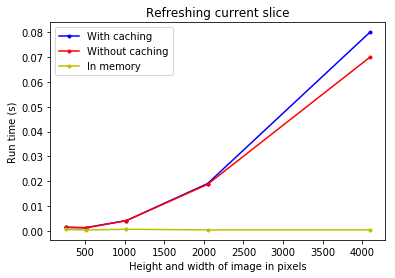

In [5]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['refresh_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['refresh_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['refresh_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Refreshing current slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

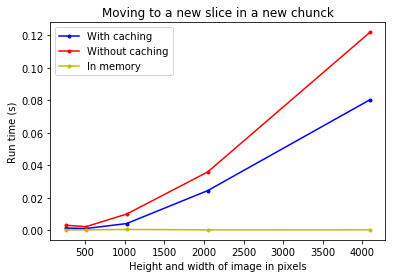

In [6]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['move_new_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['move_new_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_new_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in a new chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

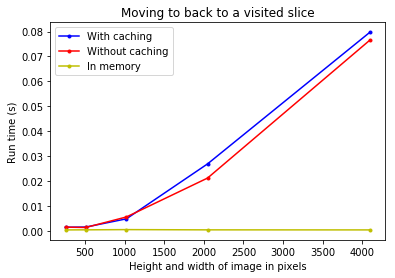

In [7]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==1]
p1 = plt.plot(df_c['N'], df_c['move_back_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==1]
p2 = plt.plot(df_c['N'], df_c['move_back_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_back_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to back to a visited slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

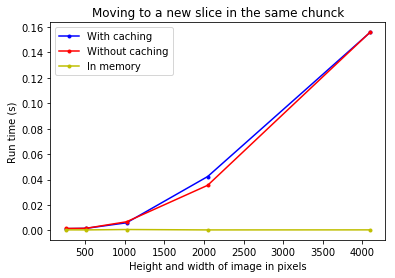

In [8]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_c = df_loc[df_loc['c']==2]
p1 = plt.plot(df_c['N'], df_c['move_in_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_c = df_loc[df_loc['c']==2]
p2 = plt.plot(df_c['N'], df_c['move_in_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
p3 = plt.plot(df_loc['N'], df_loc['move_in_time'], '.-', color='y');
plt.xlabel('Height and width of image in pixels')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in the same chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

### Look at effect of chunk size

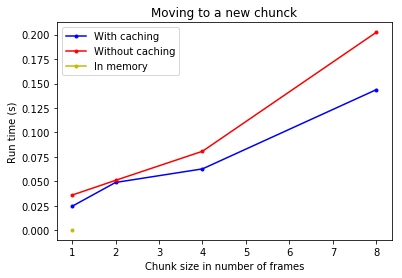

In [9]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_new_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to a new chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

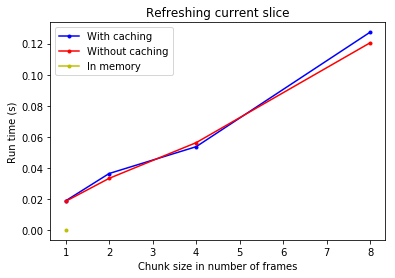

In [10]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['refresh_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Refreshing current slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

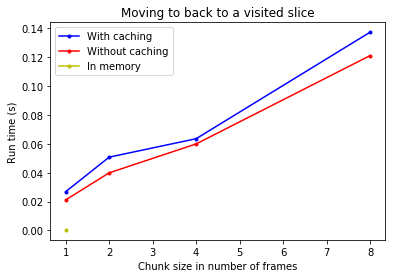

In [11]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_back_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to back to a visited slice');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));

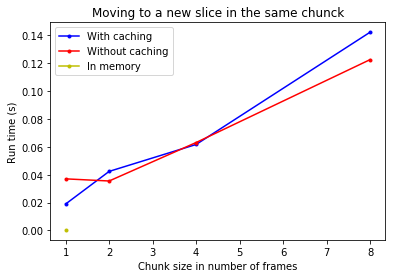

In [12]:
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='on')]
df_N = df_loc[df_loc['N']==2048]
p1 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='b');
df_loc = df[np.logical_and(df['location']=='local', df['opp_caching']=='off')]
df_N = df_loc[df_loc['N']==2048]
p2 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='r');
df_loc = df[df['location']=='in-memory']
df_N = df_loc[df_loc['N']==2048]
p3 = plt.plot(df_N['c'], df_N['move_in_time'], '.-', color='y');
plt.xlabel('Chunk size in number of frames')
plt.ylabel('Run time (s)');
plt.title('Moving to a new slice in the same chunck');
plt.legend((p1[0], p2[0], p3[0]), ('With caching', 'Without caching', 'In memory'));